In [1]:
import sys
sys.path.insert(0, '..')

from utils import data
import os
import sklearn
import numpy as np
from sklearn.neighbors import (
    KNeighborsClassifier,
    DistanceMetric
)
import json
import matplotlib.pyplot as plt

In [20]:

# ------------ HYPERPARAMETERS -------------
BASE_PATH = '../COVID-19/csse_covid_19_data/'
N_NEIGHBORS = 5
MIN_CASES = 500000
Country="China"
# ------------------------------------------

confirmed = os.path.join(
    BASE_PATH, 
    'csse_covid_19_time_series',
    'time_series_covid19_confirmed_global.csv')
confirmed = data.load_csv_data(confirmed)
features = []
targets = []

for val in np.unique(confirmed["Country/Region"]):
    df = data.filter_by_attribute(
        confirmed, "Country/Region", val)
    cases, labels = data.get_cases_chronologically(df)
    features.append(cases)
    targets.append(labels)

features = np.concatenate(features, axis=0)
targets = np.concatenate(targets, axis=0)
predictions = {}

C:\Users\dell\miniconda3\envs\coronavirus\lib\site-packages\IPython\core\interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


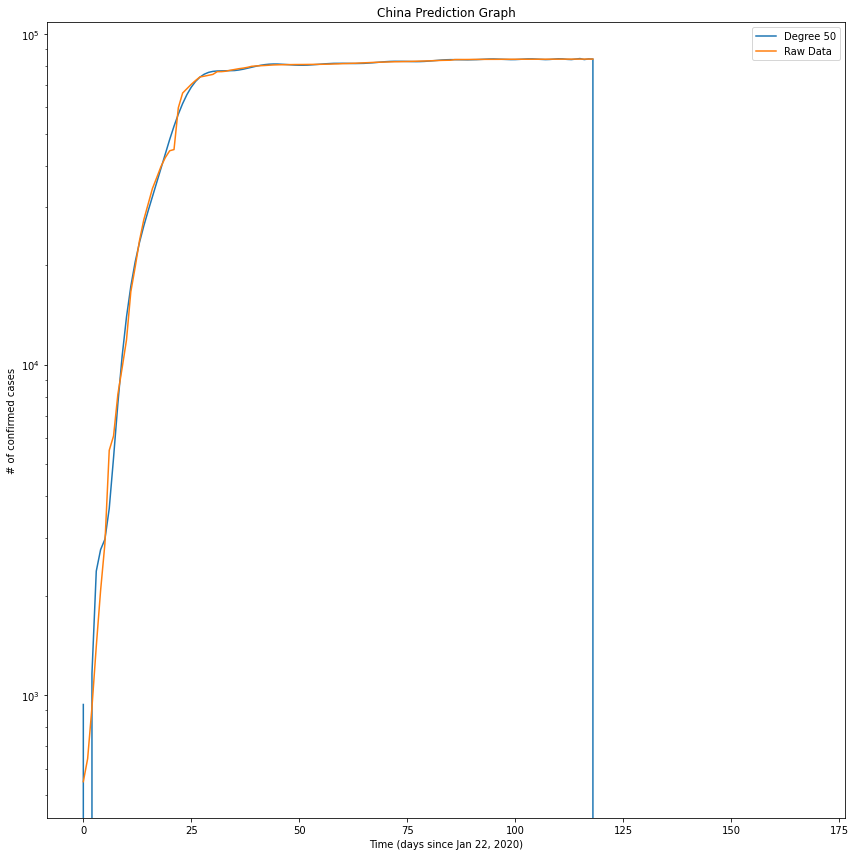

In [22]:
confirmed = os.path.join(
    BASE_PATH, 
    'csse_covid_19_time_series',
    'time_series_covid19_confirmed_global.csv')
confirmed = data.load_csv_data(confirmed)
features = []
targets = []

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
cm = plt.get_cmap('jet')
NUM_COLORS = 0
LINE_STYLES = ['solid', 'dashed', 'dotted']
NUM_STYLES = len(LINE_STYLES)



legend = []
handles = []

for val in np.unique(confirmed["Country/Region"]):
    df = data.filter_by_attribute(
        confirmed, "Country/Region", val)
    cases, labels = data.get_cases_chronologically(df)
    cases = cases.sum(axis=0)
    #print(cases.shape[0])
    if labels[0,1]==Country:
        for degree in range(50,51):
            x=np.arange(0,cases.shape[0]).astype(float)
            coe=np.polyfit(x, cases.astype(float), degree)
            pred=[]
            for i in range(0,cases.shape[0]+50):
                p=np.poly1d(coe)
                pred.append(p(i))
            lines = ax.plot(pred,label="Degree "+str(degree))
            handles.append(lines)
            legend.append("Degree "+str(degree))
        
        line=ax.plot(cases,label="Raw Data")
        handles.append(line)
        legend.append("Raw Data")
                   


ax.set_ylabel('# of confirmed cases')
ax.set_xlabel("Time (days since Jan 22, 2020)")
title=Country+" Prediction Graph"
ax.set_title(title)
ax.set_yscale('log')
ax.legend()
plt.tight_layout()
#plt.show()
figname="Prediction_"+Country+"_High.png"
plt.savefig(figname,facecolor="white",dpi=300)

    
